## Лабораторная работа № 6. Множественная линейная регрессия
### (Валяев Георгий, ПИ20-6)

In [145]:
import numpy as np
import pandas as pd
import time
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Задания для выполнения

#### Пример создания модели через возможности библиотеки scikit learn

In [45]:
X = pd.read_csv('data/7_x.csv')
Y = pd.read_csv('data/7_y.csv')
X

,1.4017687640737697,0.6668044494322577,0.7190130943915212,-0.395435688808821,0.7590031833969625
0,1.273727,1.231239,-0.107887,-0.994442,0.133631
1,-1.782506,1.219922,0.493862,-0.896872,-0.528072
2,-0.267771,-0.045769,-0.226457,0.969809,0.960164
3,-0.827729,-1.475763,-0.751357,-0.466744,0.743316
4,0.942875,-0.190490,-0.130149,-0.613091,-0.855212
...,...,...,...,...,...
377,-1.596693,-0.486095,0.121379,-0.361860,1.331080
378,-0.075549,-0.696840,0.886617,1.786000,-1.036141
379,-1.419490,-1.149049,0.723826,0.086295,-0.803215
380,0.392711,1.044820,-0.562121,0.636474,0.657975


In [46]:
Y

,43.01733436787443
0,-38.196757
1,-135.587728
2,141.451445
3,38.327764
4,-113.370585
...,...
377,73.910930
378,25.645846
379,-78.272852
380,105.094458


In [56]:
# Разделение фрейма данных на обучающую и тестовую наборы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [57]:
# Создание объекта модели обучения линейной регрессии
reg = linear_model.LinearRegression()

In [58]:
start_time = time.time()
# процесс обучения с измерением времени
reg.fit(X_train, Y_train)
end_time = time.time()
print(f"Обучение линейной регрессионной модели получилось за {round(end_time - start_time, 6)} секунд(-ы).")

Обучение линейной регрессионной модели получилось за 0.006006 секунд(-ы).


In [59]:
pred = reg.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(Y_test, pred)))
test_set_r2 = r2_score(Y_test, pred)

In [60]:
print(f"Обратите внимание, что для rmse чем ниже это значение, тем лучше подходит\nРезультат — {test_set_rmse}.\n")
print(f"Чем ближе к 1, тем лучше подходит\nРезультат — {test_set_r2}.")

Обратите внимание, что для rmse чем ниже это значение, тем лучше подходит
Результат — 11.01071359863844.

Чем ближе к 1, тем лучше подходит
Результат — 0.9907150783881009.


Значение метрики эффективности полученной модели

In [61]:
print(f'Итоговое значение метрики = {reg.score(X, Y)}')

Итоговое значение метрики = 0.9909984511016235


##### 1. Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).
##### 2. Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.

In [106]:
X_2 = pd.read_csv("data/34_x.csv", delimiter=',', names=['0', '1', '2', '3', '4', '5', '6'])
Y_2 = pd.read_csv("data/34_y.csv", delimiter=',', names=['Result'])
X_2

,0,1,2,3,4,5,6
0,0.379692,-0.538707,1.297744,0.996618,1.374295,0.384446,0.369860
1,1.513190,-0.174841,0.304366,-0.327156,-1.139509,-1.876973,-0.916081
2,1.724134,0.922148,1.186358,-0.860975,0.071025,0.672305,-0.956169
3,1.209807,-0.034638,0.518373,1.139707,0.203427,1.413589,-1.403331
4,1.025935,-1.603621,0.143145,-0.888176,1.724962,-0.730521,1.104647
...,...,...,...,...,...,...,...
300,0.369085,0.829032,0.095891,-0.932652,0.252840,1.523824,0.371031
301,-0.596272,0.955353,2.423924,-1.639020,0.073067,0.198499,-0.436227
302,-1.930802,-0.539940,0.003640,0.100045,-0.342410,0.059946,-2.186219
303,0.229888,0.706664,-1.079082,0.941274,-0.747910,-0.120137,2.271433


In [94]:
Y_2

,Result
0,71.217029
1,103.347716
2,205.359452
3,84.740282
4,81.284891
...,...
300,99.782401
301,38.049799
302,-300.734385
303,103.304561


In [72]:
dataframe = X_2
dataframe['Result'] = Y_2["Result"]
dataframe

,0,1,2,3,4,5,6,Result
0,0.379692,-0.538707,1.297744,0.996618,1.374295,0.384446,0.369860,71.217029
1,1.513190,-0.174841,0.304366,-0.327156,-1.139509,-1.876973,-0.916081,103.347716
2,1.724134,0.922148,1.186358,-0.860975,0.071025,0.672305,-0.956169,205.359452
3,1.209807,-0.034638,0.518373,1.139707,0.203427,1.413589,-1.403331,84.740282
4,1.025935,-1.603621,0.143145,-0.888176,1.724962,-0.730521,1.104647,81.284891
...,...,...,...,...,...,...,...,...
300,0.369085,0.829032,0.095891,-0.932652,0.252840,1.523824,0.371031,99.782401
301,-0.596272,0.955353,2.423924,-1.639020,0.073067,0.198499,-0.436227,38.049799
302,-1.930802,-0.539940,0.003640,0.100045,-0.342410,0.059946,-2.186219,-300.734385
303,0.229888,0.706664,-1.079082,0.941274,-0.747910,-0.120137,2.271433,103.304561


##### 3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

In [73]:
print(f"Количество точек данных в наборе: {len(dataframe.shape)}")
print(f"Количество полей данных (атрибутов): \n1) {dataframe.shape[0]}\n2) {dataframe.shape[1]}")

Количество точек данных в наборе: 2
Количество полей данных (атрибутов): 
1) 305
2) 8


In [85]:
for column in dataframe.columns:
    statics = dataframe[column].describe()
    print(f"Статистика по признаку {column}:")
    print(f"Количество атрибутов выборки: {statics['count']}")
    print(f"Среднее выборки: {statics['mean']}")
    print(f"Стандартное отклонение выборки: {statics['std']}")
    print(f"Минимальное значение выборки: {statics['min']}")
    print(f"1 квартиль выборки: {statics['25%']}")
    print(f"2 квартиль выборки: {statics['50%']}")
    print(f"3 квартиль выборки: {statics['75%']}")
    print(f"Максимальное значение выборки: {statics['max']}\n")

Статистика по признаку 0:
Количество атрибутов выборки: 305.0
Среднее выборки: 0.08235574441797006
Стандартное отклонение выборки: 0.9813127306519026
Минимальное значение выборки: -2.525158313672493
1 квартиль выборки: -0.5936423418351817
2 квартиль выборки: 0.0554653621176518
3 квартиль выборки: 0.7423074088894129
Максимальное значение выборки: 2.764258420703856

Статистика по признаку 1:
Количество атрибутов выборки: 305.0
Среднее выборки: 0.06309210964840471
Стандартное отклонение выборки: 1.009991709069869
Минимальное значение выборки: -2.552749735744485
1 квартиль выборки: -0.5631235190158668
2 квартиль выборки: 0.0257600183444568
3 квартиль выборки: 0.700231887890992
Максимальное значение выборки: 3.012542712292441

Статистика по признаку 2:
Количество атрибутов выборки: 305.0
Среднее выборки: 0.010572257304067592
Стандартное отклонение выборки: 0.9894800714541779
Минимальное значение выборки: -2.77127598665728
1 квартиль выборки: -0.7563444563473268
2 квартиль выборки: 0.0291472

##### 4. Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.

In [95]:
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, test_size=0.2, random_state=9)

In [96]:
X_2_test

,0,1,2,3,4,5,6
81,0.953071,0.786225,1.448223,0.173790,-0.517871,0.004237,0.652388
38,2.735665,-0.332992,-0.041124,-1.177510,1.264018,2.012741,-0.210833
13,0.198674,-1.609567,1.320895,1.590611,0.192285,-1.125536,0.504975
101,-0.120855,-1.141555,1.983823,-0.579452,1.668170,-0.172065,0.358384
236,-0.620104,0.565298,0.133958,-0.603855,-0.253877,1.581854,1.217132
...,...,...,...,...,...,...,...
297,-1.496107,1.605165,0.415612,-1.435500,0.812217,-0.751098,1.095259
105,-0.822426,0.173505,-0.324586,1.283785,-2.227639,-1.021957,-0.397050
206,-0.312069,0.278000,0.423390,-1.773203,-1.058221,-0.992419,1.008917
32,-1.265123,0.213849,0.715933,0.263894,1.753211,0.023289,0.570446


In [97]:
Y_2_test

,Result
81,201.008437
38,203.684171
13,10.271067
101,22.699859
236,28.399755
...,...
297,-0.690694
105,-109.338716
206,29.487443
32,-49.879413


In [98]:
X_2_train

,0,1,2,3,4,5,6
150,-0.089086,-1.194386,1.283810,-1.214304,0.319990,-0.072730,-0.717072
192,-0.060129,2.488751,-1.533675,0.893367,0.788858,0.766142,1.427813
109,-0.570800,-0.876066,-0.484024,0.104329,-1.859212,0.489226,-0.371862
158,-1.165569,0.507034,-0.018961,-0.714858,0.148550,-0.902662,-0.263454
231,0.499989,1.341765,-0.641766,-0.999820,1.575967,0.529680,-0.261788
...,...,...,...,...,...,...,...
65,-1.254007,-0.938059,-0.107991,-1.226427,0.251622,-1.020946,0.584928
125,0.783949,-2.184614,-0.396933,-0.517147,0.814473,-1.109219,-0.175421
251,0.160967,2.363788,0.556487,-1.016747,1.589950,0.422069,1.698270
56,-0.424735,-0.358700,1.569927,-1.248143,-0.476326,-0.227789,-0.858088


In [99]:
Y_2_train

,Result
150,-51.908638
192,121.191507
109,-125.568591
158,-83.069325
231,87.712544
...,...
65,-153.027376
125,-64.208517
251,193.921629
56,-26.792367


##### 5. Для целевого и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

In [119]:
slr = linear_model.LinearRegression()
x_tr = np.array(X_2['0']).reshape(-1, 1)
slr.fit(x_tr, Y_2)
y_pred = slr.predict(x_tr)
print(f'Slope: {slr.coef_[0][0]}')
print(f'Intercept: {slr.intercept_[0]}')
print(f'Final score: {slr.score(x_tr, Y_2)}')

Slope: 86.83673972860664
Intercept: 7.102985120390292
Final score: 0.5784128761539589


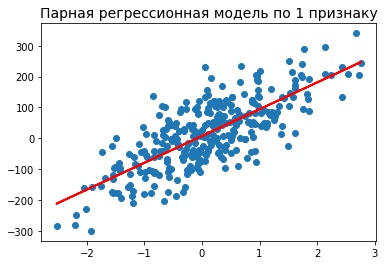

In [116]:
plt.scatter(x_tr, Y_2)
plt.title("Парная регрессионная модель по 1 признаку", fontsize=14)
plt.plot(x_tr, slr.predict(x_tr), color='red', linewidth=2)
plt.show()

In [120]:
slr = linear_model.LinearRegression()
x_tr = np.array(X_2['1']).reshape(-1, 1)
slr.fit(x_tr, Y_2)
y_pred = slr.predict(x_tr)
print(f'Slope: {slr.coef_[0][0]}')
print(f'Intercept: {slr.intercept_[0]}')
print(f'Final score: {slr.score(x_tr, Y_2)}')

Slope: 40.8012792380131
Intercept: 11.680250680089307
Final score: 0.1352693004074379


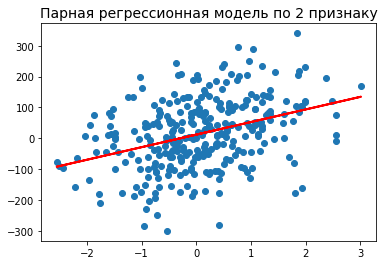

In [121]:
plt.scatter(x_tr, Y_2)
plt.title("Парная регрессионная модель по 2 признаку", fontsize=14)
plt.plot(x_tr, slr.predict(x_tr), color='red', linewidth=2)
plt.show()

In [122]:
slr = linear_model.LinearRegression()
x_tr = np.array(X_2['2']).reshape(-1, 1)
slr.fit(x_tr, Y_2)
y_pred = slr.predict(x_tr)
print(f'Slope: {slr.coef_[0][0]}')
print(f'Intercept: {slr.intercept_[0]}')
print(f'Final score: {slr.score(x_tr, Y_2)}')

Slope: 29.5756319421535
Intercept: 13.94180827274636
Final score: 0.06821788279642071


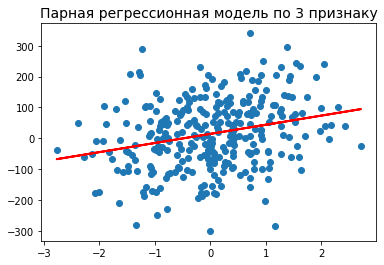

In [124]:
plt.scatter(x_tr, Y_2)
plt.title("Парная регрессионная модель по 3 признаку", fontsize=14)
plt.plot(x_tr, slr.predict(x_tr), color='red', linewidth=2)
plt.show()

In [125]:
slr = linear_model.LinearRegression()
x_tr = np.array(X_2['3']).reshape(-1, 1)
slr.fit(x_tr, Y_2)
y_pred = slr.predict(x_tr)
print(f'Slope: {slr.coef_[0][0]}')
print(f'Intercept: {slr.intercept_[0]}')
print(f'Final score: {slr.score(x_tr, Y_2)}')

Slope: -3.859128660503041
Intercept: 14.106661626034297
Final score: 0.0010996786173483875


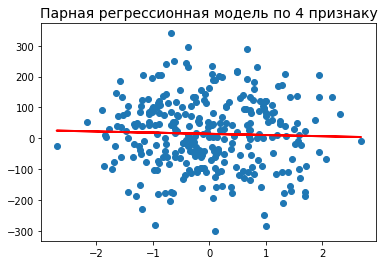

In [126]:
plt.scatter(x_tr, Y_2)
plt.title("Парная регрессионная модель по 4 признаку", fontsize=14)
plt.plot(x_tr, slr.predict(x_tr), color='red', linewidth=2)
plt.show()

In [127]:
slr = linear_model.LinearRegression()
x_tr = np.array(X_2['4']).reshape(-1, 1)
slr.fit(x_tr, Y_2)
y_pred = slr.predict(x_tr)
print(f'Slope: {slr.coef_[0][0]}')
print(f'Intercept: {slr.intercept_[0]}')
print(f'Final score: {slr.score(x_tr, Y_2)}')

Slope: 4.135670392286748
Intercept: 14.048422677747299
Final score: 0.001299716586544597


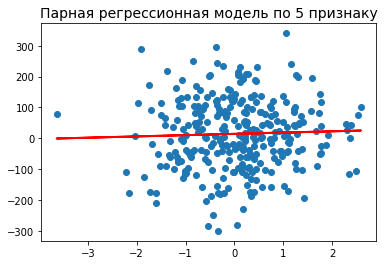

In [128]:
plt.scatter(x_tr, Y_2)
plt.title("Парная регрессионная модель по 5 признаку", fontsize=14)
plt.plot(x_tr, slr.predict(x_tr), color='red', linewidth=2)
plt.show()

In [129]:
slr = linear_model.LinearRegression()
x_tr = np.array(X_2['5']).reshape(-1, 1)
slr.fit(x_tr, Y_2)
y_pred = slr.predict(x_tr)
print(f'Slope: {slr.coef_[0][0]}')
print(f'Intercept: {slr.intercept_[0]}')
print(f'Final score: {slr.score(x_tr, Y_2)}')

Slope: 9.132590321752842
Intercept: 14.607540217457977
Final score: 0.006372363654025492


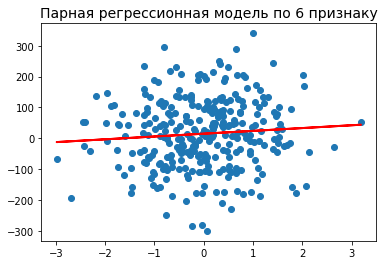

In [130]:
plt.scatter(x_tr, Y_2)
plt.title("Парная регрессионная модель по 6 признаку", fontsize=14)
plt.plot(x_tr, slr.predict(x_tr), color='red', linewidth=2)
plt.show()

In [137]:
slr = linear_model.LinearRegression()
x_tr = np.array(X_2['6']).reshape(-1, 1)
slr.fit(x_tr, Y_2)
y_pred = slr.predict(x_tr)
print(f'Slope: {slr.coef_[0][0]}')
print(f'Intercept: {slr.intercept_[0]}')
print(f'Final score: {slr.score(x_tr, Y_2)}')

Slope: 46.908997823433566
Intercept: 10.776113935401714
Final score: 0.1783465701303315


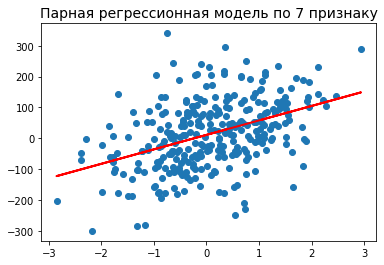

In [138]:
plt.scatter(x_tr, Y_2)
plt.title("Парная регрессионная модель по 7 признаку", fontsize=14)
plt.plot(x_tr, slr.predict(x_tr), color='red', linewidth=2)
plt.show()

##### 6. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [142]:
slr = linear_model.LinearRegression()
slr.fit(X_2_train, Y_2_train)
y_train_pred = slr.predict(X_2_train)
y_test_pred = slr.predict(X_2_test)

Поскольку в нашей модели несколько независимых переменных, мы не можем отобразить их зависимость на двумерном пространстве, но можем нанести на график связь между остатками модели и предсказанными значениями, что также поможет нам диагностировать качество модели. Это называется Residuals plot. C его помощью мы можем увидет нелинейность и выбросы, проверить случайность распределения ошибки.

In [143]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
    mean_squared_error(Y_2_train, y_train_pred),
    mean_squared_error(Y_2_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
    r2_score(Y_2_train, y_train_pred),
    r2_score(Y_2_test, y_test_pred)))

MSE train: 95.828, test: 142.803
R^2 train: 0.992, test: 0.991


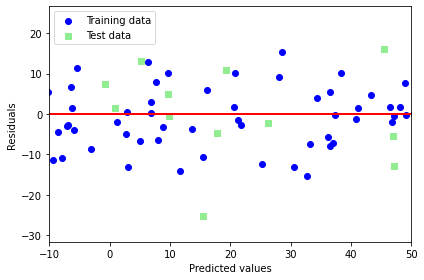

In [144]:
plt.scatter(y_train_pred, y_train_pred - Y_2_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - Y_2_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()